# Stock Picking

Docs:


In [1]:
!pip3 install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement talib (from versions: none)
ERROR: No matching distribution found for talib


In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

%load_ext autoreload
%autoreload 2

## Get Tickers

In [2]:
from folib.market import get_nasdaq100_tickers
tickers = get_nasdaq100_tickers()
print(tickers)

['ADBE', 'AMD', 'ABNB', 'GOOGL', 'GOOG', 'AMZN', 'AEP', 'AMGN', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'ARM', 'ASML', 'AZN', 'TEAM', 'ADSK', 'ADP', 'BKR', 'BIIB', 'BKNG', 'AVGO', 'CDNS', 'CDW', 'CHTR', 'CTAS', 'CSCO', 'CCEP', 'CTSH', 'CMCSA', 'CEG', 'CPRT', 'CSGP', 'COST', 'CRWD', 'CSX', 'DDOG', 'DXCM', 'FANG', 'DLTR', 'DASH', 'EA', 'EXC', 'FAST', 'FTNT', 'GEHC', 'GILD', 'GFS', 'HON', 'IDXX', 'ILMN', 'INTC', 'INTU', 'ISRG', 'KDP', 'KLAC', 'KHC', 'LRCX', 'LIN', 'LULU', 'MAR', 'MRVL', 'MELI', 'META', 'MCHP', 'MU', 'MSFT', 'MRNA', 'MDLZ', 'MDB', 'MNST', 'NFLX', 'NVDA', 'NXPI', 'ORLY', 'ODFL', 'ON', 'PCAR', 'PANW', 'PAYX', 'PYPL', 'PDD', 'PEP', 'QCOM', 'REGN', 'ROP', 'ROST', 'SBUX', 'SMCI', 'SNPS', 'TTWO', 'TMUS', 'TSLA', 'TXN', 'TTD', 'VRSK', 'VRTX', 'WBD', 'WDAY', 'XEL', 'ZS']


## Load Screener

In [3]:
from folib.screener import Screener

screener = Screener(tickers)
df = screener.to_dataframe()
df.head()

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

,name,industry,sector,currency,financial_currency,shares_outstanding,market_cap,previous_close,trailing_eps,forward_eps,trailing_pe,forward_pe,beta,quick_ratio,debt_to_equity,return_on_equity,revenue_cagr,rsi_14
symbol,,,,,,,,,,,,,,,,,,
ADBE,Adobe Inc.,Software - Infrastructure,Technology,USD,USD,440200000,211890270000.0,481.35,None,None,41.152287,23.670074,1.289,0.966,41.788,0.35355,0.146826,None
AMD,"Advanced Micro Devices, Inc.",Semiconductors,Technology,USD,USD,1622809984,228345592848.640015,140.71,None,None,125.36284,27.776472,1.695,1.575,3.927,0.03262,0.324402,None
ABNB,"Airbnb, Inc.",Travel Services,Consumer Cyclical,USD,USD,440001984,60223071550.080002,136.87,None,None,18.751022,29.960873,1.172,0.722,28.418,0.74175,0.431853,None
GOOGL,Alphabet Inc.,Internet Content & Information,Communication Services,USD,USD,5842999808,988869287505.920044,169.24,None,None,22.511938,18.944197,1.038,1.761,9.324,0.32101,0.189751,None
GOOG,Alphabet Inc.,Internet Content & Information,Communication Services,USD,USD,5534000128,944543141847.040039,170.68,None,None,22.733423,19.17338,1.038,1.761,9.324,0.32101,0.189751,None


In [9]:
def make_pretty(styler):
    def highlight_forward_pe(val):
        return 'color: white; background-color: green' if isinstance(val, float) and val <= 20 else ''
    
    def highlight_quick_ratio(val):
        return 'color: white; background-color: green' if isinstance(val, float) and val >= 1 and val <= 2 else ''
    
    def highlight_debt_to_equity(val):
        return 'color: white; background-color: green' if isinstance(val, float) and val >= 0.5 and val <= 1 else ''
    
    def highlight_return_on_equity(val):
        return 'color: white; background-color: green' if isinstance(val, float) and val >= 0.15 else ''

    # Apply styles
    styler = styler.applymap(highlight_forward_pe, subset=['forward_pe'])
    styler = styler.applymap(highlight_quick_ratio, subset=['quick_ratio'])
    styler = styler.applymap(highlight_debt_to_equity, subset=['debt_to_equity'])
    styler = styler.applymap(highlight_return_on_equity, subset=['return_on_equity'])
    
    return styler

df.style.pipe(make_pretty)


C:\Users\jlche\AppData\Local\Temp\ipykernel_1532\4207603623.py:15: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styler = styler.applymap(highlight_forward_pe, subset=['forward_pe'])
C:\Users\jlche\AppData\Local\Temp\ipykernel_1532\4207603623.py:16: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styler = styler.applymap(highlight_quick_ratio, subset=['quick_ratio'])
C:\Users\jlche\AppData\Local\Temp\ipykernel_1532\4207603623.py:17: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styler = styler.applymap(highlight_debt_to_equity, subset=['debt_to_equity'])
C:\Users\jlche\AppData\Local\Temp\ipykernel_1532\4207603623.py:18: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styler = styler.applymap(highlight_return_on_equity, subset=['return_on_equity'])


,name,industry,sector,currency,financial_currency,shares_outstanding,market_cap,previous_close,trailing_eps,forward_eps,trailing_pe,forward_pe,beta,quick_ratio,debt_to_equity,return_on_equity,revenue_cagr,rsi_14
symbol,,,,,,,,,,,,,,,,,,
ADBE,Adobe Inc.,Software - Infrastructure,Technology,USD,USD,440200000,211890270000.000000,481.350000,None,None,41.152287,23.670074,1.289000,0.966000,41.788000,0.353550,0.146826,None
AMD,"Advanced Micro Devices, Inc.",Semiconductors,Technology,USD,USD,1622809984,228345592848.640015,140.710000,None,None,125.362840,27.776472,1.695000,1.575000,3.927000,0.032620,0.324402,None
ABNB,"Airbnb, Inc.",Travel Services,Consumer Cyclical,USD,USD,440001984,60223071550.080002,136.870000,None,None,18.751022,29.960873,1.172000,0.722000,28.418000,0.741750,0.431853,None
GOOGL,Alphabet Inc.,Internet Content & Information,Communication Services,USD,USD,5842999808,988869287505.920044,169.240000,None,None,22.511938,18.944197,1.038000,1.761000,9.324000,0.321010,0.189751,None
GOOG,Alphabet Inc.,Internet Content & Information,Communication Services,USD,USD,5534000128,944543141847.040039,170.680000,None,None,22.733423,19.173380,1.038000,1.761000,9.324000,0.321010,0.189751,None
AMZN,"Amazon.com, Inc.",Internet Retail,Consumer Cyclical,USD,USD,10515000320,2058626762649.600098,195.780000,None,None,42.537310,32.704918,1.147000,0.827000,61.175000,0.225580,0.141867,None
AEP,"American Electric Power Company, Inc.",Utilities - Regulated Electric,Utilities,USD,USD,532120000,52360608000.000000,98.400000,None,None,20.080000,16.789297,0.534000,0.320000,169.394000,0.105140,0.083614,None
AMGN,Amgen Inc.,Drug Manufacturers - General,Healthcare,USD,USD,537532992,170349580494.720001,316.910000,None,None,40.829920,15.469478,0.602000,0.804000,802.418000,0.557200,0.035024,None
ADI,"Analog Devices, Inc.",Semiconductors,Technology,USD,USD,496492992,111308763876.479996,224.190000,None,None,65.345350,28.859417,1.071000,1.138000,23.070000,0.046580,0.299846,None


In [17]:
L = (1, 2, None)
min((x for x in L if x is not None))

1

## Single Ticker Playground

In [7]:
import yfinance as yf

yt = yf.Ticker('AAPL')
yt.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '(408) 996-1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and p

In [72]:
def financial_metric_growth(yahoo_ticker: yf.Ticker, statement: str = 'income_stmt', metric: str = 'Total Revenue'):
    # Get the annual income statement metric for the company
    annual= getattr(yahoo_ticker, statement).loc[metric].sort_index().dropna()  # Reverse the order to have the most recent year at the end
    annual = annual.astype(float).pct_change().dropna()

    # Get the quarterly income statement metric for the company
    quarterly = getattr(yahoo_ticker, f'quarterly_{statement}').loc[metric].sort_index().dropna()  # Reverse the order to have the most recent year at the end
    quarterly = quarterly.astype(float).pct_change(periods=4).dropna()
    
    # Depending whether last quarter ends with last year
    if annual.index[-1].timestamp() == quarterly.index[-1].timestamp():
        return annual.iloc[-1]
    else: # or not
        # print(annual.iloc[-1], quarterly.iloc[-1])
        return 0.5*annual.iloc[-1] + 0.5*quarterly.iloc[-1]

financial_metric_growth(yt)

0.25562401116216005

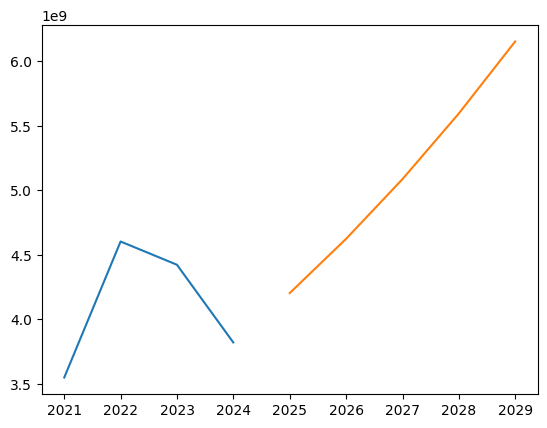

In [7]:
import matplotlib.pyplot as plt

def cagr_forecast(data: pd.Series, years_forecast: int = 5, rate: float = 0):
    """
    Forecast future values using the Compound Annual Growth Rate (CAGR) method.

    Args:
        data (pd.Series): Historical data with a DatetimeIndex.
        years_forecast (int, optional): Number of years to forecast. Defaults to 5.
        rate (float, optional): Annual growth rate. Defaults to 0.

    Returns:
        pd.Series: Forecasted values for the specified number of years.
    """
    # Calculate the forecasted values
    years = np.arange(1, years_forecast + 1)
    forecast_values = data.iloc[-1] * (1 + rate) ** years

    # Create a DatetimeIndex for the forecasted years
    forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=years_forecast, freq='YE')

    # Create a Series with the forecasted values
    forecast_series = pd.Series(forecast_values, index=forecast_index)

    return forecast_series

s = yt.cash_flow.loc['Free Cash Flow'].sort_index().dropna()
lf = cagr_forecast(s, years_forecast=5, rate=0.1)

plt.plot(s.index, s.values, label='Historical Data')
plt.plot(lf.index, lf.values, label='Forecast')

In [81]:
s = yt.cash_flow.loc['Free Cash Flow'].sort_index().dropna()
forecast_index = pd.date_range(start=s.index[-1] + pd.DateOffset(years=1), periods=5, freq='YE')
forecast_index

DatetimeIndex(['2024-12-31', '2025-12-31', '2026-12-31', '2027-12-31',
               '2028-12-31'],
              dtype='datetime64[ns]', freq='YE-DEC')

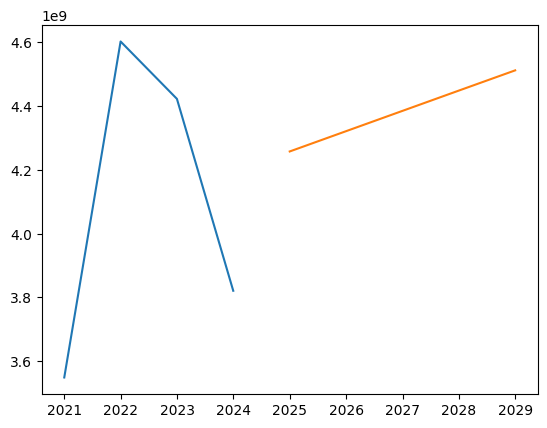

In [8]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def linear_forecast(data: pd.Series, years_forecast: int = 5):
    X = data.index.year.values.reshape(-1, 1)
    y = data.values
    model = LinearRegression().fit(X, y)
    years = range(data.index.year.max() + 1, data.index.year.max() + years_forecast + 1)
    forecast_X = np.array(years).reshape(-1, 1)
    forecast_y = model.predict(forecast_X)
    forecast_index = pd.date_range(start=s.index[-1] + pd.DateOffset(years=1), periods=5, freq='YE')
    return pd.Series(forecast_y, index=forecast_index)

s = yt.cash_flow.loc['Free Cash Flow'].sort_index().dropna()
lf = linear_forecast(s, years_forecast=5)

plt.plot(s.index, s.values, label='Historical Data')
plt.plot(lf.index, lf.values, label='Forecast')

In [9]:
yt.balance_sheet

,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Treasury Shares Number,23575299.0,22318881.0,20390882.0,19542488.0,NaN
Ordinary Shares Number,148500074.0,149756492.0,151684491.0,152532885.0,NaN
Share Issued,172075373.0,172075373.0,172075373.0,172075373.0,NaN
Net Debt,NaN,NaN,NaN,NaN,126000000.0
Total Debt,9702000000.0,8489000000.0,9318000000.0,8019000000.0,NaN
...,...,...,...,...,...
Receivables,3916000000.0,3264000000.0,3789000000.0,3535000000.0,NaN
Accounts Receivable,3916000000.0,3264000000.0,3789000000.0,3535000000.0,NaN
Cash Cash Equivalents And Short Term Investments,10607000000.0,8747000000.0,9323000000.0,8664000000.0,NaN
Other Short Term Investments,1871000000.0,1331000000.0,NaN,NaN,NaN


In [15]:
yt.balance_sheet.index

Index(['Treasury Shares Number', 'Ordinary Shares Number', 'Share Issued',
       'Net Debt', 'Total Debt', 'Tangible Book Value', 'Invested Capital',
       'Working Capital', 'Net Tangible Assets', 'Capital Lease Obligations',
       'Common Stock Equity', 'Total Capitalization',
       'Total Equity Gross Minority Interest', 'Minority Interest',
       'Stockholders Equity', 'Gains Losses Not Affecting Retained Earnings',
       'Other Equity Adjustments', 'Treasury Stock', 'Retained Earnings',
       'Additional Paid In Capital', 'Capital Stock', 'Common Stock',
       'Preferred Stock', 'Total Liabilities Net Minority Interest',
       'Total Non Current Liabilities Net Minority Interest',
       'Other Non Current Liabilities',
       'Preferred Securities Outside Stock Equity', 'Employee Benefits',
       'Non Current Deferred Liabilities',
       'Non Current Deferred Taxes Liabilities',
       'Long Term Debt And Capital Lease Obligation',
       'Long Term Capital Lease Oblig

In [22]:
def wacc(yahoo_ticker: yf.Ticker, risk_free_rate: float = 0.03, tax_rate: float = 0.20):
    """
    Calculate the Weighted Average Cost of Capital (WACC) for a company.

    Args:
    

    Returns:
        float: The calculated WACC.
    """
    # Calculate the Cost of Equity (Re) using CAPM
    beta = yahoo_ticker.info['beta']
    market_return = 0.08 # TODO
    cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)

    # Calculate the Cost of Debt (Rd)
    long_term_debt = yahoo_ticker.balance_sheet.loc['Long Term Debt'].iloc[0]
    print(f'Long Term Debt: {long_term_debt}')
    current_debt = yahoo_ticker.balance_sheet.loc['Current Debt'].iloc[0]
    print(f'Current Debt: {current_debt}')
    total_debt = long_term_debt + current_debt
    interest_expense = abs(yahoo_ticker.income_stmt.loc['Interest Expense'].iloc[0])  # absolute value as it is typically negative
    print(f'Interest Expense: {interest_expense}')
    cost_of_debt = interest_expense / total_debt if total_debt > 0 else 0
    after_tax_cost_of_debt = cost_of_debt * (1 - tax_rate)

    # Calculate E/V and D/V
    market_cap = yahoo_ticker.info['marketCap']
    enterprise_value = market_cap + total_debt
    equity_weight = market_cap / enterprise_value
    debt_weight = total_debt / enterprise_value

    # Calculate WACC
    wacc = (equity_weight * cost_of_equity) + (debt_weight * after_tax_cost_of_debt)
    print(f"The WACC for {yahoo_ticker.info['symbol']} is: {wacc:.2%}")
    return wacc

wacc(yt, risk_free_rate())

KeyError: 'Long Term Debt'

In [16]:
def valueFromDCF(yahoo_ticker: yf.Ticker, years_forecast: int = 5):
    # TODO compare currency and financialCurrency
    currency=yahoo_ticker.info['currency']
    financialCurrency=yahoo_ticker.info['financialCurrency']

    # Get cash flow statement
    cash_flow = yahoo_ticker.cash_flow

    # Extract the Free Cash Flow (FCF) for the last few years
    fcf = cash_flow.loc['Free Cash Flow'].sort_index().dropna()

    # Forecast Free Cash Flows for the next years_forecast (5 to 10 years)
    # TODO Consider testing linear trend with statsmodels.api.OLS (check p-value <= 0.05)
    # TODO Consider scipy.optimize.curve_fit and CAGR as alternate methods
    #fcf_forecast = cagr_forecast(fcf, years_forecast, fcf.astype(float).pct_change().mean())
    fcf_forecast = linear_forecast(fcf, years_forecast)
    
    # Determine the discount rate (WACC)
    # For simplicity, we will assume a constant discount rate (WACC), typically between 7% and 10%
    discount_rate = 0.08 # wacc(yahoo_ticker, 0, 0)

    # TODO use https://github.com/numpy/numpy-financial
    # TODO check https://github.com/dibiasej/PyValuation

    # Discount the Free Cash Flows to the present value
    # Note: npv from numpy_financial starts with current year (not part of forecasts)
    discounted_fcf = 0
    for i in range(1, years_forecast + 1):
        discounted_fcf += fcf_forecast.iloc[i-1] / (1 + discount_rate) ** i
    
    # Calculate the Terminal Value using the perpetuity method
    terminal_growth_rate = risk_free_rate(currency)
    terminal_value = fcf_forecast.iloc[-1] * (1 + terminal_growth_rate) / (discount_rate - terminal_growth_rate)

    # Discount the terminal value to present value
    terminal_value_discounted = terminal_value / (1 + discount_rate) ** years_forecast

    # Calculate the Total Enterprise Value (TEV) by summing discounted FCF and terminal value
    total_enterprise_value = discounted_fcf + terminal_value_discounted

    # Get the number of outstanding shares
    shares_outstanding = yahoo_ticker.info['sharesOutstanding']

    # Calculate the intrinsic stock price
    intrinsic_value_per_share = total_enterprise_value / shares_outstanding

    # Print the calculated intrinsic value per share
    print(f"Intrinsic value of {yahoo_ticker.info['symbol']} stock based on DCF analysis: ${intrinsic_value_per_share:.2f}")

    return intrinsic_value_per_share

# Try
valueFromDCF(yt, 5)

Intrinsic value of BLK stock based on DCF analysis: $545.03


545.0269776546338